# Final Project: World Happiness Report 2008-2023

Name: Alex Wako (5267489)

In [288]:
import numpy as np
import pandas as pd
import altair as alt
from statsmodels.multivariate.pca import PCA
import statsmodels.api as sm

whr = pd.read_csv('data/whr-2023.csv')

alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [289]:
whr.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [290]:
# Rename columns for readability
columns = {
    'Country name': 'Country',
    'Healthy life expectancy at birth': 'HLE at birth',
    'Freedom to make life choices': 'Freedom of choice',
}
whr.rename(columns = columns, inplace = True)
whr.head()

,Country,year,Life Ladder,Log GDP per capita,Social support,HLE at birth,Freedom of choice,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


In [291]:
# Check for the number of rows
whr.shape[0]

2199

In [292]:
# Remove NA value
whr.dropna(inplace = True)
whr.shape[0]

1958

Although rows with NA values are dropped, there is sufficienty observations for the data to answer the questions. Some countries will have some years of data missing, but the year of when the data was taken is not necessary for the project

## The Data

The data is the index and scores of the World Happiness Report from 2008-2023. The data is found from World Happiness Report website and sourced by information found in the Gallup World Poll. Each index is based on reports made in the poll from country residents and explained by six index marked by the variable descriptions in the table below. The population of interest are the people surveyed from the Gallup World Poll. Inferences about the population can likely not be made because the polls are made from random residents of respective countries.

Name | Variable description | Type | Units of measurement
---|---|---|---
Country | Country Name | String | None 
year | Year that the data was taken | Numeric | Years 
Life Ladder | Happiness Score (1-10) determined by GWP Index Measurements | Numeric | None
Log GDP per Capita | Log Gross Domestic Product per Capita | Numeric | USD
Social Support (GWP Index) | National Average of Social Support questions answered based on Binary Response | Numeric | None
HLE at birth | Life expectancy at birth based on World Health Organization | Numeric | Years
Freedom of choice (GWP Index) | National Average of Freedom to make life choices questions answered based on Binary Response | Numeric | None
Generosity (GWP Index) | National Average of Generosity questions answered based on Binary Response | Numeric | None
Perceptions of corruption (GWP Index) | National Average of Perceptions of Corruption questions answered based on Binary Response | Numeric | None
Positive affect (GWP Index) | National Average of Positive affect questions answered based on Binary Response | Numeric | None
Negative affect (GWP Index) | National Average of Negative affect questions answered based on Binary Response | Numeric | None

## Question

The question I want to answer with this dataset is: **Is there evidence that a newborn can lead to a healthy long life given the happiness of the country?**

The World Happiness Report have been using the GWP index poll as a method to determine the happiness and satisfaction of the people of a country. These binary responses are a result of random people answering questions, but I want to understand how this can relate to a healthy life expectancy of a person at birth. The HLE at birth variable is data that is tracked through real world situations, but the polls are just how they feel about a country. This can change all the time, and although the polls are random, different factors such as politics and religious beliefs can unknowinglly add bias to the data. The healthy life expectancy is a result of infrastrucutre and culture of the country, so a strong relationship with the polls should not exist as the flexible poll data is being compared to a inflexible life expectancy data.

I would expect the results to show very little relationship and variance explained from the data. People's feelings and thoughts of a country can change all the time through events such as elections and wars, so happiness is too subjective to the current climate of the country and not the past information that could affect the healthy life expectancy at birth.

The model will not be using the life ladder variable because although it combines all six factors, it won't give any information on what variables affect the healthy life expectancy of each country.

## Process

In [293]:
# Drop Life Ladder
whr_main = whr.drop('Life Ladder', axis = 1)
whr_main.head()

,Country,year,Log GDP per capita,Social support,HLE at birth,Freedom of choice,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,7.581,0.521,51.4,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,7.661,0.521,51.7,0.531,0.238,0.776,0.614,0.268


As mentioned in the description, the Life Ladder column is deterministic of all other GWP Indices, therefore, to remove bias in the model, the Life Ladder column will be dropped.

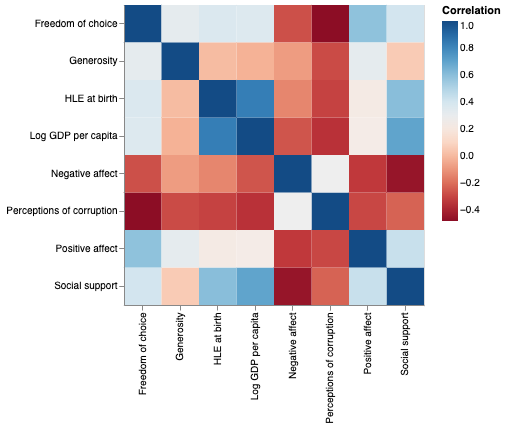

In [294]:
# Create Correlation Matrix
whr_main = whr_main.drop(columns = ['Country', 'year'], axis = 1)
col_corr = whr_main.corr()
col_corr = col_corr.reset_index().rename(
    columns = {'index': 'row'}
).melt(
    id_vars = 'row', var_name = 'col', value_name = 'Correlation'
)

# Correlation Plot
alt.Chart(col_corr).mark_rect().encode(
    x = alt.X('col', title = ''), 
    y = alt.Y('row', title = ''),
    color = alt.Color('Correlation', scale = alt.Scale(scheme = 'redblue'), legend = alt.Legend(tickCount = 5))
).properties(width = 300, height = 300)

All the variables are no too strongly correlated with eachother, but Log GDP per capita seems to have a strong correlation with the response, so the variable will be dropped from the model. Having a variable with too big of a correlation to the response may make it difficult to explain the effects of the other variables, so dropping it would help improve the effects of the other variables. In an actual situation, countries with a higher GDP per capita will likely have the infrastructure and development to support individuals for a long, fulfilling life, so it is not unexpected to see a strong correlation.

Now all that is left in the data as variables are the GWP Index, but some questions may be similarly answered to others. The correlation plot can show some of what is expected from answers of different questions. For example, answers for perceptions of corruption negatively correlates with freedom of choice, possibly allowing the two variables to be reduced into one.

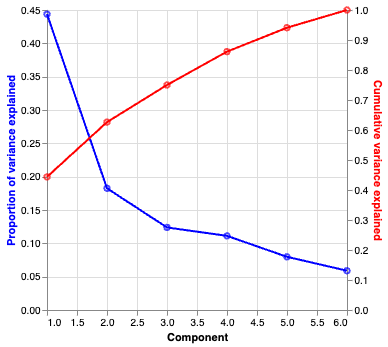

In [295]:
variables = whr_main.drop(columns = ['Log GDP per capita', 'HLE at birth'], axis = 1)
response = whr_main.loc[:, 'HLE at birth']

# Normalize the data and compute PCA
pca = PCA(variables, standardize = True) # Although all data is a result of the average of binary responses, some questions had multiple answers

# Find the number of principal components
var_ratios = pca.eigenvals/pca.eigenvals.sum()
pca_var_explained = pd.DataFrame({'Component': np.arange(1, 7), 'Proportion of variance explained': var_ratios})
pca_var_explained['Cumulative variance explained'] = var_ratios.cumsum()

## The Plot
base = alt.Chart(pca_var_explained).encode(x = 'Component')
prop_var_base = base.encode(y = alt.Y('Proportion of variance explained', axis = alt.Axis(titleColor = 'Blue')))
cum_var_base = base.encode(y = alt.Y('Cumulative variance explained', axis = alt.Axis(titleColor = 'Red')))
prop_var = prop_var_base.mark_line(stroke = 'Blue') + prop_var_base.mark_point(color = 'Blue')
cum_var = cum_var_base.mark_line(stroke = 'Red') + cum_var_base.mark_point(stroke = 'Red')
var_explained_plot = alt.layer(prop_var, cum_var).resolve_scale(y = 'independent')

var_explained_plot

There is a drop off in the proportion of variance explained after component 3, so a good chunk of the data can likely be explained with three variables.

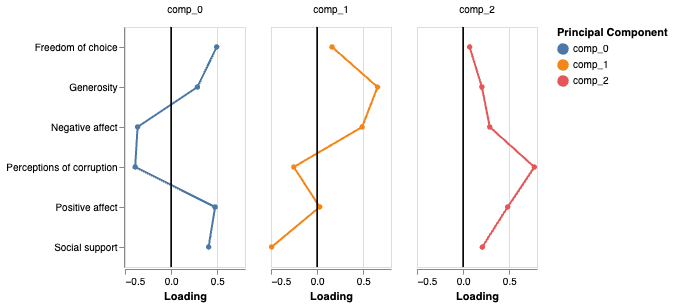

In [296]:
n_pc = 3

# Find the weight of each variable in loadings
pca_loadings = pca.loadings.iloc[:, 0:n_pc]

## The Plot
pca_loadings = pca_loadings.reset_index().melt(id_vars = 'index', var_name = 'Principal Component', value_name = 'Loading').rename(columns = {'index': 'Variables'})
pca_loadings['zero'] = np.repeat(0, len(pca_loadings))
base = alt.Chart(pca_loadings)
loadings = base.mark_line(point = True).encode(y = alt.X('Variables', title = ''), x = 'Loading', color = 'Principal Component')
rule = base.mark_rule().encode(x = alt.X('zero', title = 'Loading'))
loading_plot = (loadings + rule).properties(width = 120, height = 240)
loading_plot.facet(column = alt.Column('Principal Component', title = ''))

Looking at the loading value of each variable in each principal component, freedom can explain the first component. Freedom to make choices allows for a happier person, while corruption attempts to limit those freedom. The second component explains support. Whether its people or the government, the feeling of support is an important factor to keep striving for happiness. The third component is the government. How do people feel about the government and its control over their society. 

To create these new variables, the loading values of each old variable will be used as multipliers to their original value.

In [297]:
pc_loading = pca.loadings.iloc[:, 0:n_pc]
whr_variables = pc_loading.index.to_list()

# Freedom PC
freedom_pc = {}
for i in range(pc_loading.shape[0]):
    freedom_pc[whr_variables[i]] = pc_loading.iloc[i, 0]

# Support PC
support_pc = {}
for i in range(pc_loading.shape[0]):
    support_pc[whr_variables[i]] = pc_loading.iloc[i, 1]

# Government PC
govern_pc = {}
for i in range(pc_loading.shape[0]):
    govern_pc[whr_variables[i]] = pc_loading.iloc[i, 2]

# Create new columns for the PC
pc1 = (variables * pd.Series(freedom_pc)).sum(axis = 1)
pc2 = (variables * pd.Series(support_pc)).sum(axis = 1)
pc3 = (variables * pd.Series(govern_pc)).sum(axis = 1)
whr_pc = pd.DataFrame({'Freedom PC': pc1, 'Support PC': pc2, 'Government PC': pc3, 'HLE at Birth': response})

whr_pc

,Freedom PC,Support PC,Government PC,HLE at Birth
0,0.344289,-0.082865,1.132364,50.500
1,0.424598,-0.124325,1.156786,50.800
2,0.419482,-0.120778,1.052359,51.100
3,0.349070,-0.111574,1.048431,51.400
4,0.433258,-0.064726,1.165503,51.700
...,...,...,...,...
2194,0.583283,-0.384959,1.233363,52.625
2195,0.510011,-0.381134,1.218291,53.100
2196,0.490907,-0.259163,1.222146,53.575
2197,0.492940,-0.336905,1.121373,54.050


The new data frame represents the principal components we found earlier combined with the HLE at birth. Now that the data is processed, a model can be trained. Theoretically, the model should look like:

$$\text{HLE at Birth} = \beta_0 + \beta_1\text{Freedom PC} + \beta_2\text{Support PC} + \beta_3\text{Government PC}$$

### Training the Data

In [298]:
# Train Test split
np.random.seed(1)
idx_pc = np.random.choice(whr_pc.index.values, size = int(round(whr_pc.shape[0] * 0.7, 0)), replace = False).tolist()
train_pc = whr_pc.loc[idx_pc]
test_pc = whr_pc.drop(index = idx_pc)

# Explanatory variable matrix and response
y_pc = train_pc.loc[:, 'HLE at Birth']
x_pc = sm.tools.add_constant(train_pc.iloc[:, 0:3])

# The model
model_pc = sm.OLS(endog = y_pc, exog = x_pc)
result_pc = model_pc.fit()

# The coefficients
coef_pc = pd.DataFrame(
    {'estimate': result_pc.params.values, 'standard error': np.sqrt(result_pc.cov_params().values.diagonal())},
    index = x_pc.columns 
)
coef_pc.loc['error variance', 'estimate'] = result_pc.scale

coef_pc

,estimate,standard error
const,50.999346,1.734205
Freedom PC,16.862820,0.830228
Support PC,-14.995217,1.198286
Government PC,-2.486238,1.254141
error variance,37.806876,NaN


In [299]:
print(model_pc.fit().conf_int().rename(columns = {0: 'lwr', 1: 'upr'}))
print(f'R squared : {result_pc.rsquared}')

                     lwr        upr
const          47.597354  54.401338
Freedom PC     15.234161  18.491480
Support PC    -17.345895 -12.644538
Government PC  -4.946487  -0.025989
R squared : 0.26538405837556156


An expected result, the model could not find a strong relationship that could explain the variance in the data. Interstingly, with 95% confidence, a single year increase of a healthy life expectancy results in a decrease in the support of people and government by 17.3 to 12.6 and a decrease of 4.9 to 0.02 in the government. I factored in support of government in the support principal component, but it seems that a relationship with more government control and less government support is a possible model to determine the healthy life expectancy. Freedom is a fairly obvious positive variable as freedom creates more opportunity of happiness and more happiness can lead to a healthier life.

I can see if without the principal components analysis, the original data could explain the relationship better. The expected model is:
$$\text{HLE at Birth} = \beta_0 + \beta_1\text{Social Support} + \beta_2\text{Freedom of choice} + \beta_3\text{Generosity} +
\beta_4\text{Corruption} + \beta_5\text{Positive} + \beta_6\text{Negative} 
$$

In [300]:
whr_main = whr_main.drop('Log GDP per capita', axis = 1)

# Train Test split
np.random.seed(1)
idx_main = np.random.choice(whr_main.index.values, size = int(round(whr_main.shape[0] * 0.7, 0)), replace = False).tolist()
train_main = whr_main.loc[idx_main]
test_main = whr_main.drop(index = idx_main)

# Explanatory variable matrix and response
y_main = train_main.loc[:, 'HLE at birth']
x_main = sm.tools.add_constant(train_main.iloc[:, [0, 2, 3, 4, 5, 6]])

# The model
model_main = sm.OLS(endog = y_main, exog = x_main)
result_main = model_main.fit()

# The coefficients
coef_main = pd.DataFrame(
    {'estimate': result_main.params.values, 'standard error': np.sqrt(result_main.cov_params().values.diagonal())},
    index = x_main.columns 
)
coef_main.loc['error variance', 'estimate'] = result_main.scale

coef_main

,estimate,standard error
const,32.509869,1.853345
Social support,36.804832,1.430618
Freedom of choice,8.325083,1.404209
Generosity,-4.403360,0.978703
Perceptions of corruption,-7.576218,0.907762
Positive affect,-6.860839,1.773018
Negative affect,17.495043,1.928631
error variance,28.532831,NaN


In [301]:
print(model_main.fit().conf_int().rename(columns = {0: 'lwr', 1: 'upr'}))
print(f'R squared : {result_main.rsquared}')

                                 lwr        upr
const                      28.874153  36.145585
Social support             33.998382  39.611282
Freedom of choice           5.570439  11.079726
Generosity                 -6.323287  -2.483434
Perceptions of corruption  -9.356979  -5.795457
Positive affect           -10.338977  -3.382701
Negative affect            13.711639  21.278448
R squared : 0.44680241184783986


Once again an expected result, the model could not find a strong relationship that could explain the variance in the data, but the relationship is much stronger according to the rsquared, although by default rsquared increases with the number of predictors. Interestingly, the positive affect seems to have a negative correlation with healthy life expectancy while negative affect seems to have the opposite. I feel like this could be due to the current climate of the country compared to the past. People feel more sad/less happy because they feel the country became gloomier or worse than the past, but this is not a comparison to the entire world, where likely there are people living in much worse conditions, but a comparison to their past. I guess bias does exist because while the question compares it self to the entire world, the data collected is only comparing to their own country.

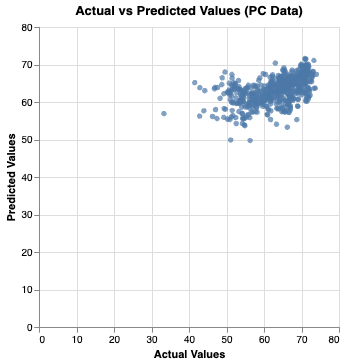

In [302]:
# Prediction results pc data
x_test_pc = sm.tools.add_constant(test_pc.iloc[:, 0:3])
y_test_pc = test_pc.loc[:, 'HLE at Birth']

pred_pc = result_pc.predict(x_test_pc)

pred_pc_df = pd.DataFrame({'Actual Values': y_test_pc, 'Predicted Values': pred_pc})

# Plot
plot_pc = alt.Chart(pred_pc_df).mark_circle().encode(
    x='Actual Values',
    y='Predicted Values'
).properties(
    title='Actual vs Predicted Values (PC Data)'
)

plot_pc

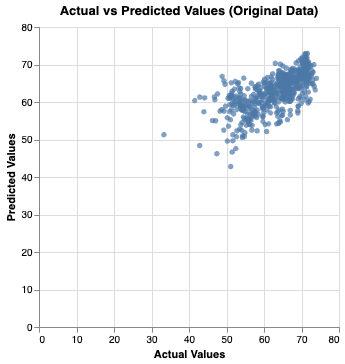

In [303]:
# Prediction results original data
x_test_main = sm.tools.add_constant(test_main.iloc[:, [0, 2, 3, 4, 5, 6]])
y_test_main = test_main.loc[:, 'HLE at birth']

pred_main = result_main.predict(x_test_main)

pred_main_df = pd.DataFrame({'Actual Values': y_test_main, 'Predicted Values': pred_main})

# Plot
plot_main = alt.Chart(pred_main_df).mark_circle().encode(
    x='Actual Values',
    y='Predicted Values'
).properties(
    title='Actual vs Predicted Values (Original Data)'
)
plot_main

In [304]:
# Sum of Squared Residuals for PC Data
ssr_pc = pred_pc_df['Actual Values'] - pred_pc_df['Predicted Values']
print(f'Sum of Squared Residuals: {(ssr_pc ** 2).sum()}')

# Sum of Squared Residuals for Original Data
ssr_main = pred_main_df['Actual Values'] - pred_main_df['Predicted Values']
print(f'Sum of Squared Residuals: {(ssr_main ** 2).sum()}')

Sum of Squared Residuals: 19875.700626212267
Sum of Squared Residuals: 14917.324719504468


## Result
As expected, the poll index used to identify the happiness level of a country does not have a strong relationship with the healthy life expectancy of a person at birth. As previously mentioned, the infrastrucutre and culture that mostly affect the healthy life expectancy at birth levels is much harder to change than a person's opinion on the country, so a strong relationship should not exist between the two variables. Interestingly, in the most accurate model, the original data model, parts of what would be expected to increase heatlhy life expectancy actually decreased it. When asked questions for the poll, people are likely comparing their situation to past situations in the same country, so when there are countries that see improvements in citizen satisfaction and happiness, even when not developed, they may have a better positive affect and generosity variable than developed countries. The opposite can be likely said about the negative affect variable. Understandably, the social support, freedom of choice, and corruption moved the model in what was expected, with social support being the biggest factor. Although the model lacks accuracy, as what was expected, information can be taken from the models, leading to the conclusion that there is no significant evidence that happiness can lead to a long healthy life expectancy, but the vaiables such as freedom and social support - which are factors used in the World Happiness Report to define happinees - do support the idea of a healthy long life.